In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
path = "C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/Face Mask Dataset/"

In [5]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            
dataset = pd.DataFrame(dataset)

,image_path,mask_status,where
0,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Test
1,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Test
2,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Test
3,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Test
4,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Test


In [6]:
dataset.describe()

,image_path,mask_status,where
count,11792,11792,11792
unique,11792,2,3
top,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithoutMask,Train
freq,1,5909,10000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11792 entries, 0 to 11791
Data columns (total 3 columns):
image_path     11792 non-null object
mask_status    11792 non-null object
where          11792 non-null object
dtypes: object(3)
memory usage: 276.5+ KB


In [8]:
#haar cascade algorithm

In [9]:
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')

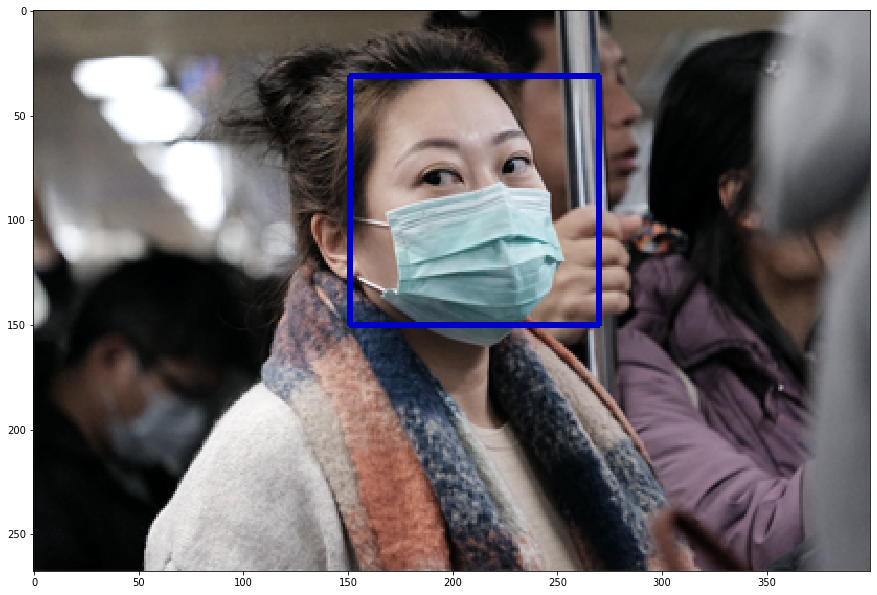

In [10]:
## Choosing a random image to detect the face in the image
face_model = cv2.CascadeClassifier('C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/haarcascades/haarcascade_frontalface_default.xml')

## Choosing the image from the directory
img = cv2.imread("C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/face-mask-detection/images/maksssksksss349.png")

## Converting the image to grayscale to apply haarcascade algorithm
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

## Returns the x, y, w, h co-ordinates as numpy arrays for all the detected faces
detected_face = face_model.detectMultiScale(img)

## Converting from grayscale to colored image
output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

## Drawing rectangle box around the faces in the image
for (x, y, w, h) in detected_face:
    cv2.rectangle(output_img, (x,y), (x+w, y+h), (0, 0, 200), 2)
    
## Displaying the image
plt.figure(figsize = (15, 15))
plt.imshow(output_img)

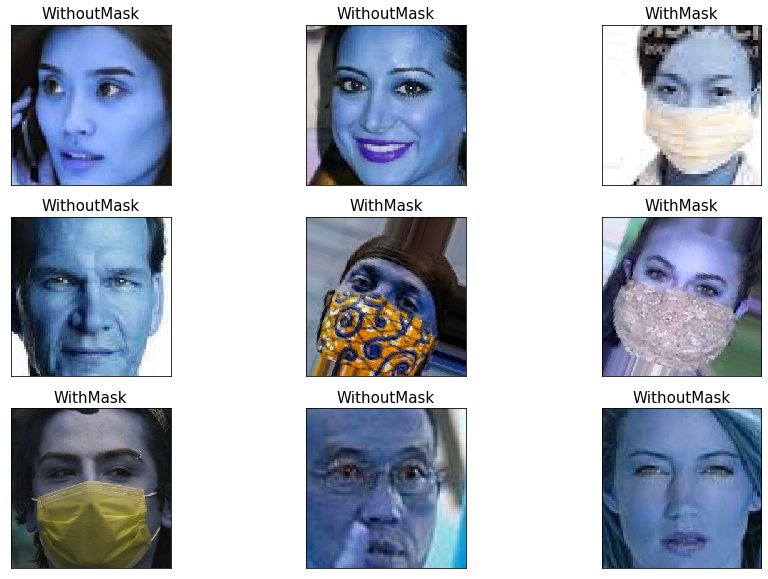

In [118]:
plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [13]:
## Splitting train test and Validation Dataset
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

## Shuffling the dataset 
train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
valid_df = valid_df.sample(frac = 1)

print("\n After Shuffling \n")
print(train_df.head(10))

                                             image_path mask_status  where
992   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
993   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
994   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
995   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
996   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
997   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
998   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
999   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
1000  C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train
1001  C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...    WithMask  Train

 After Shuffling 

                                              image_path  mask_status  where
5515   C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...     WithMask  Train
7

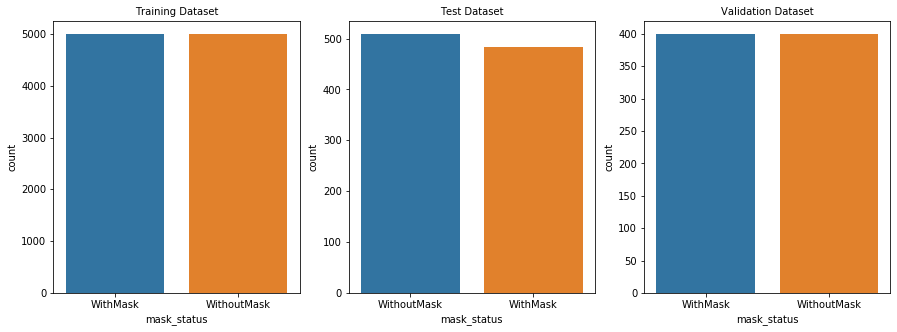

In [14]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [15]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Train
1,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithoutMask,Train
2,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Train
3,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithoutMask,Train
4,C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/...,WithMask,Train


In [16]:
## Reading all the image into a list and changing the size of the image to (150,150)
data = []
image_size = 150

for i in range(len(train_df)):
    ## Converting the image into grayscale
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    ## Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    ##Encoding the image with the label
    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [17]:
data = np.array(data)

C:\Users\Shreyas CL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [18]:
data[0][0].shape

(150, 150)

In [19]:
np.random.shuffle(data)

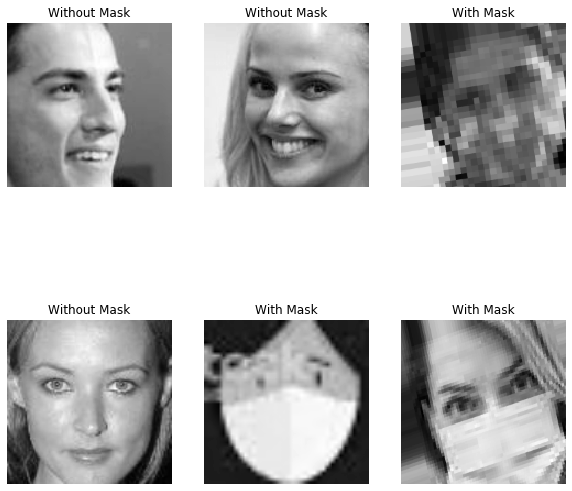

In [96]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
    
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()

In [21]:
X = []
y = []

## Seperating X and y
for image in data:
    X.append(image[0])
    y.append(image[1])
    
## Converting X and y to numpy array as Tensorflow accepts only numpy arrays
X = np.array(X)
y = np.array(y)

In [22]:
### Normalizing the data
X = X/255
### Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
# model.summary()

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [64]:
# X_train = X_train.reshape(-1, 32, 150, 150)
## Reshaping training set to match Conc2D
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
250/250 [==============================] - 1076s 4s/step - loss: 0.0646 - accuracy: 0.9779
Epoch 2/5
250/250 [==============================] - 1048s 4s/step - loss: 0.0472 - accuracy: 0.9825
Epoch 3/5
250/250 [==============================] - 1057s 4s/step - loss: 0.0321 - accuracy: 0.9893
Epoch 4/5
250/250 [==============================] - 1033s 4s/step - loss: 0.0238 - accuracy: 0.9908
Epoch 5/5
250/250 [==============================] - 1046s 4s/step - loss: 0.0265 - accuracy: 0.9908


In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 147456)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               18874496  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 18,912,193
Trainable params: 18,912,193
Non-trainable params: 0
____________________________________________

In [66]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 47s 736ms/step - loss: 0.0919 - accuracy: 0.9750


[0.09186339378356934, 0.9750000238418579]

In [88]:
prediction = model.predict_classes(X_val)

In [89]:
print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       995
           1       0.96      0.99      0.98      1005

    accuracy                           0.97      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.97      0.97      2000

[[953  42]
 [  8 997]]


In [90]:
prediction[1:5]

array([[0],
       [1],
       [1],
       [1]])

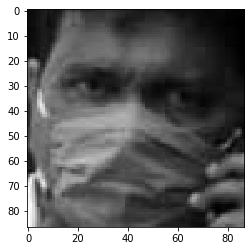

In [110]:
# read the image
image = cv2.imread('C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/85.png')
 
# convert color image into grayscale image
img1 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
 
# plot that grayscale image with Matplolib
# cmap stands for colormap
plt.imshow(img1, cmap='gray')
 
# display that image
plt.show()

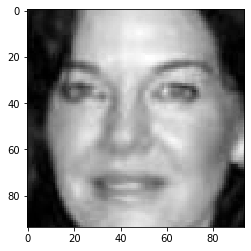

In [111]:
# read the image
image = cv2.imread('C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/46.png')
 
# convert color image into grayscale image
img1 = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
 
# plot that grayscale image with Matplolib
# cmap stands for colormap
plt.imshow(img1, cmap='gray')
 
# display that image
plt.show()

In [122]:
img = cv2.imread('C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/85.png', cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img,(150,150))

img = np.reshape(img,[1,150,150,1])

prediction = model.predict_classes(img)

print (prediction[0][0])

if prediction == True:
    print('Wearing mask')
else:
    print('not wearing mask')

1
Wearing mask


In [121]:
img = cv2.imread("C:/Users/Shreyas CL/Desktop/4TH SEM/DTL/input/46.png", cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img,(150,150))

img = np.reshape(img,(1,150,150,1))
#img = np.array(img)
prediction = model.predict_classes(img)

print (prediction[0][0])

if prediction == True:
    print('Wearing mask')
else:
    print('not wearing mask')

0
not wearing mask
